In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df["deposit"].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
import matplotlib.pyplot as plt

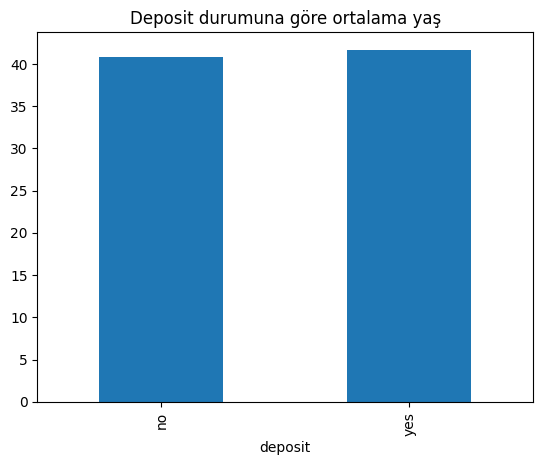

In [ ]:
df.groupby("deposit")["age"].mean().plot(kind="bar")
plt.title("Deposit durumuna göre ortalama yaş")
plt.show()

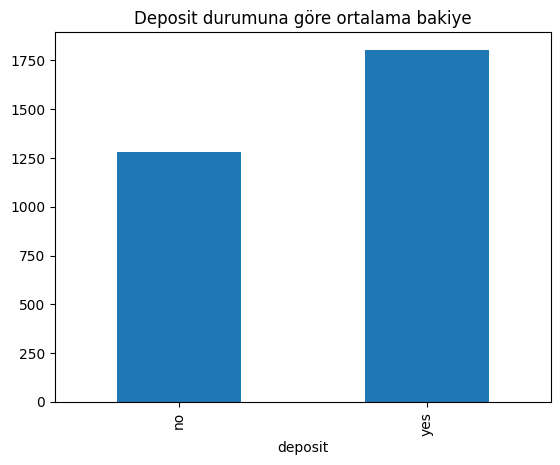

In [ ]:
df.groupby("deposit")["balance"].mean().plot(kind="bar")
plt.title("Deposit durumuna göre ortalama bakiye")
plt.show()

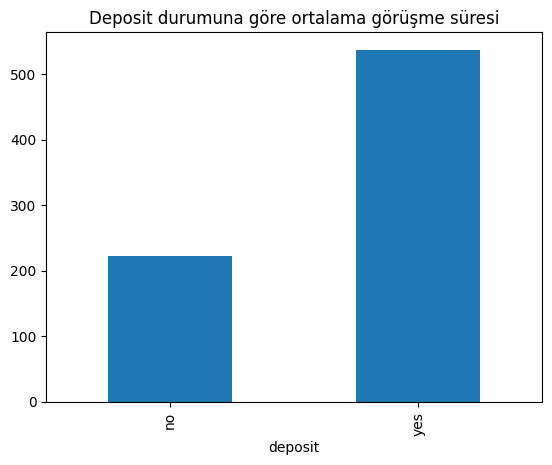

In [ ]:
df.groupby("deposit")["duration"].mean().plot(kind="bar")
plt.title("Deposit durumuna göre ortalama görüşme süresi")
plt.show()

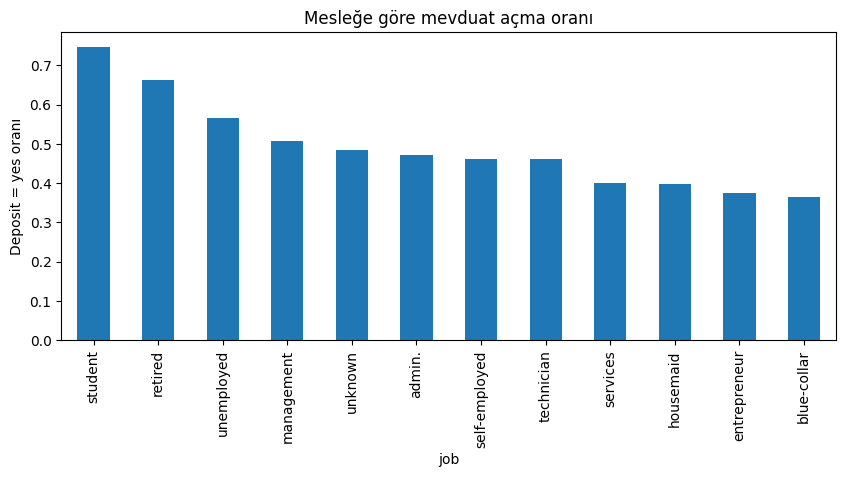

In [ ]:
import matplotlib.pyplot as plt

(df.groupby("job")["deposit"]
   .value_counts(normalize=True)
   .unstack()["yes"]
   .sort_values(ascending=False)
   .plot(kind="bar", figsize=(10,4)))

plt.title("Mesleğe göre mevduat açma oranı")
plt.ylabel("Deposit = yes oranı")
plt.show()

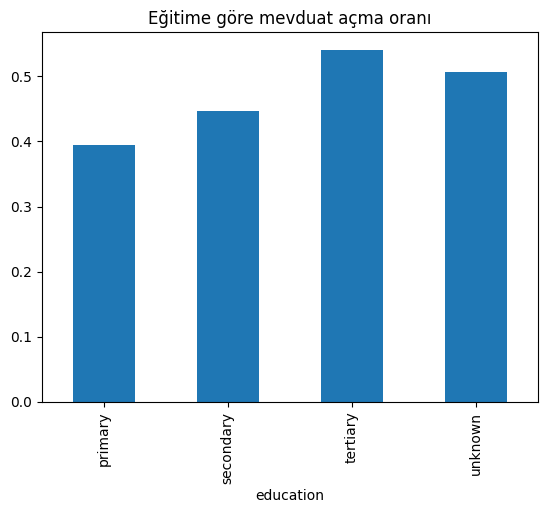

In [ ]:
(df.groupby("education")["deposit"]
   .value_counts(normalize=True)
   .unstack()["yes"]
   .plot(kind="bar"))

plt.title("Eğitime göre mevduat açma oranı")
plt.show()

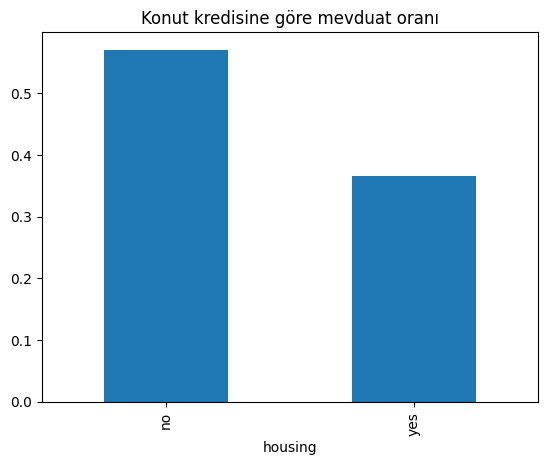

In [ ]:
(df.groupby("housing")["deposit"]
   .value_counts(normalize=True)
   .unstack()["yes"]
   .plot(kind="bar"))

plt.title("Konut kredisine göre mevduat oranı")
plt.show()

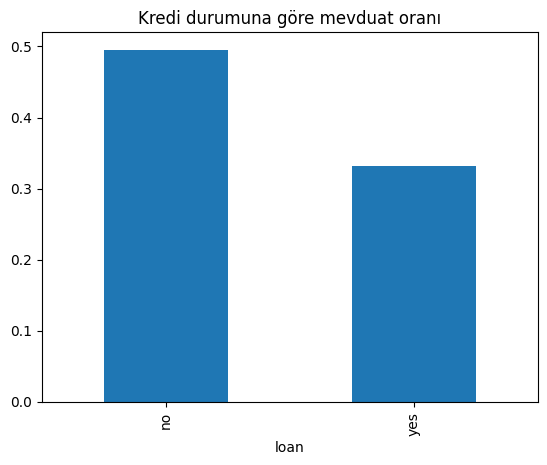

In [ ]:
(df.groupby("loan")["deposit"]
   .value_counts(normalize=True)
   .unstack()["yes"]
   .plot(kind="bar"))

plt.title("Kredi durumuna göre mevduat oranı")
plt.show()

In [ ]:
df_model = df[["age", "balance", "duration", "campaign", "deposit"]].copy()
df_model["deposit"] = df_model["deposit"].map({"yes": 1, "no": 0})

In [ ]:
from sklearn.model_selection import train_test_split

X = df_model.drop("deposit", axis=1)
y = df_model["deposit"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1166
           1       0.75      0.61      0.67      1067

    accuracy                           0.71      2233
   macro avg       0.72      0.71      0.71      2233
weighted avg       0.72      0.71      0.71      2233

